In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
adhd_pre = pd.read_csv('../../data/adhd_pre_features_tfidf_256.csv')
adhd_post = pd.read_csv('../../data/adhd_post_features_tfidf_256.csv')

In [3]:
adhd_pre.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,adhd,S-Kay21,2019/01/18,How much further ahead could I have been by no...,8.459177,7.726622,8.311028,70.522575,61.675635,11.637404,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125537,0.0,0.0,0.113802
1,adhd,lismox42,2019/01/18,ADHD &amp; Bipolar Anyone else have Bipolar Di...,5.956429,9.791686,7.368571,54.701429,81.142857,8.514286,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,adhd,reddit_noob_1234,2019/01/18,My relationship is falling apart and I don’t k...,8.665417,7.066678,9.323750,66.212917,61.812500,12.283333,...,0.0,0.0,0.0,0.173326,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,adhd,JITTERdUdE,2019/01/18,To those struggling to write papers- drink cof...,5.527654,6.429964,5.696265,81.254138,67.643411,8.086092,...,0.0,0.0,0.0,0.212811,0.0,0.099299,0.000000,0.0,0.0,0.000000
4,adhd,buddingaddiction,2019/01/18,Meds didn't cure chronic laziness But I can fo...,5.382632,8.627205,6.746579,63.613553,73.736842,10.115789,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [4]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

adhd_pre = adhd_pre.loc[:, columns_of_interest]
adhd_post = adhd_post.loc[:, columns_of_interest]

In [5]:
adhd_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,adhd,S-Kay21,2019/01/18,How much further ahead could I have been by no...,3
1,adhd,lismox42,2019/01/18,ADHD &amp; Bipolar Anyone else have Bipolar Di...,0
2,adhd,reddit_noob_1234,2019/01/18,My relationship is falling apart and I don’t k...,0
3,adhd,JITTERdUdE,2019/01/18,To those struggling to write papers- drink cof...,2
4,adhd,buddingaddiction,2019/01/18,Meds didn't cure chronic laziness But I can fo...,1


In [6]:
adhd_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16696 entries, 0 to 16695
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            16696 non-null  object
 1   author               16696 non-null  object
 2   date                 16696 non-null  object
 3   post                 16696 non-null  object
 4   substance_use_total  16696 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 652.3+ KB


In [7]:
adhd_post.head(5)

,subreddit,author,date,post,substance_use_total
0,adhd,bcefghijklmnopsvwxyz,2020/01/01,ADHD gets worse at night High school senior he...,0
1,adhd,juicyaznbooty,2020/01/01,The First Step of a multi-step task Perhaps yo...,0
2,adhd,tercelkisor,2020/01/01,I have been carrying around Play-Doh for years...,1
3,adhd,mikhela,2020/01/01,How do you keep from getting bored in a relati...,0
4,adhd,DoggieDesert6,2020/01/01,I need entertain Hello I used to play games li...,0


In [8]:
adhd_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13602 entries, 0 to 13601
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            13602 non-null  object
 1   author               13602 non-null  object
 2   date                 13602 non-null  object
 3   post                 13602 non-null  object
 4   substance_use_total  13602 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 531.5+ KB


In [9]:
adhd_pre.describe()

,substance_use_total
count,16696.000000
mean,0.557678
std,1.137150
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,23.000000


In [10]:
adhd_post.describe()

,substance_use_total
count,13602.000000
mean,0.499706
std,1.022592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,24.000000


In [11]:
adhd_pre['period'] = 'pre'
adhd_post['period'] = 'post'

adhd_df = pd.concat([adhd_pre, adhd_post])
adhd_df

,subreddit,author,date,post,substance_use_total,period
0,adhd,S-Kay21,2019/01/18,How much further ahead could I have been by no...,3,pre
1,adhd,lismox42,2019/01/18,ADHD &amp; Bipolar Anyone else have Bipolar Di...,0,pre
2,adhd,reddit_noob_1234,2019/01/18,My relationship is falling apart and I don’t k...,0,pre
3,adhd,JITTERdUdE,2019/01/18,To those struggling to write papers- drink cof...,2,pre
4,adhd,buddingaddiction,2019/01/18,Meds didn't cure chronic laziness But I can fo...,1,pre
...,...,...,...,...,...,...
13597,adhd,yoitsupperlefty,2020/04/20,I HAVE BEEN TRYING TO GET MY PRESCRIPTION FILL...,0,post
13598,adhd,chaoslord13,2020/04/20,Reminders System Thats Helped Me Actually Be P...,3,post
13599,adhd,Adhelpmeee,2020/04/20,Pharmacists ruder than usual? I went to the ph...,0,post
13600,adhd,bruh21111,2020/04/20,"Help,..... . \n\nI know this is against guidel...",0,post


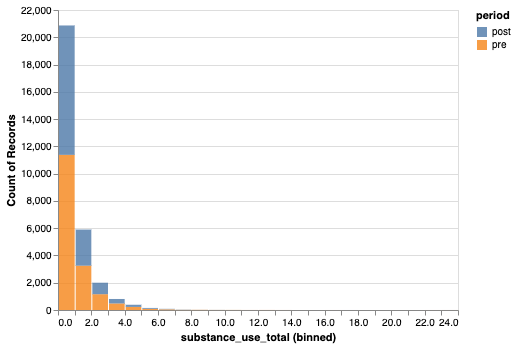

In [12]:
alt.Chart(adhd_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

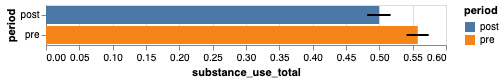

In [13]:
plot = alt.Chart(adhd_df).mark_bar().encode(
    x='mean(substance_use_total)',
    y='period',
    color='period'
)

err_bars = alt.Chart(adhd_df).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='substance_use_total',
    y='period')

plot + err_bars

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(adhd_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(adhd_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 16696
Number of unique authors (posters) in 'post' dataset: 13602


We have a roughly balanced data set of users posting before and after the pandemic.   
We see that the mean of `substance_use_total` was greater before the pandemic rather than after.